# 🔒 Cybersecurity Data Cleaning & Interactive EDA

This notebook performs comprehensive data cleaning and exploratory data analysis on cybersecurity web attack data with interactive visualizations.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

# Set pandas options for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [ ]:
# 📊 Load and initial data cleaning
print("🔄 Loading cybersecurity data...")
try:
    df = pd.read_csv("../data/CloudWatch_Traffic_Web_Attack.csv")
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    print("❌ Data file not found. Please check the file path.")
    raise

# 🧹 Data Cleaning Steps
print("\n🧹 Starting data cleaning process...")

# ✅ 1. Remove Duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"✅ Removed {initial_rows - len(df)} duplicate rows")

# ✅ 2. Handle missing values
print(f"\n📊 Missing values per column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# ✅ 3. Convert time columns with error handling
time_columns = ['creation_time', 'end_time', 'time']
for col in time_columns:
    if col in df.columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            print(f"✅ Converted {col} to datetime")
        except Exception as e:
            print(f"⚠️ Warning: Could not convert {col} to datetime: {e}")

# ✅ 4. Standardize country codes
if 'src_ip_country_code' in df.columns:
    df['src_ip_country_code'] = df['src_ip_country_code'].str.upper()
    print("✅ Standardized country codes to uppercase")

# ✅ 5. Create session_duration with error handling
if 'creation_time' in df.columns and 'end_time' in df.columns:
    df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()
    # Handle negative or zero durations
    df['session_duration'] = df['session_duration'].clip(lower=0.1)  # Minimum 0.1 seconds
    print("✅ Created session_duration column")

# ✅ 6. Clean numeric columns
numeric_columns = ['bytes_in', 'bytes_out', 'dst_port']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(0)

print("\n✅ Data cleaning completed!")
print(f"📊 Final dataset shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")


✅ Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object             
 12  s

In [ ]:
# 📊 Interactive Data Overview
print("📊 Dataset Overview:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe())

print("\n🔍 Sample of cleaned data:")
print(df.head(10))


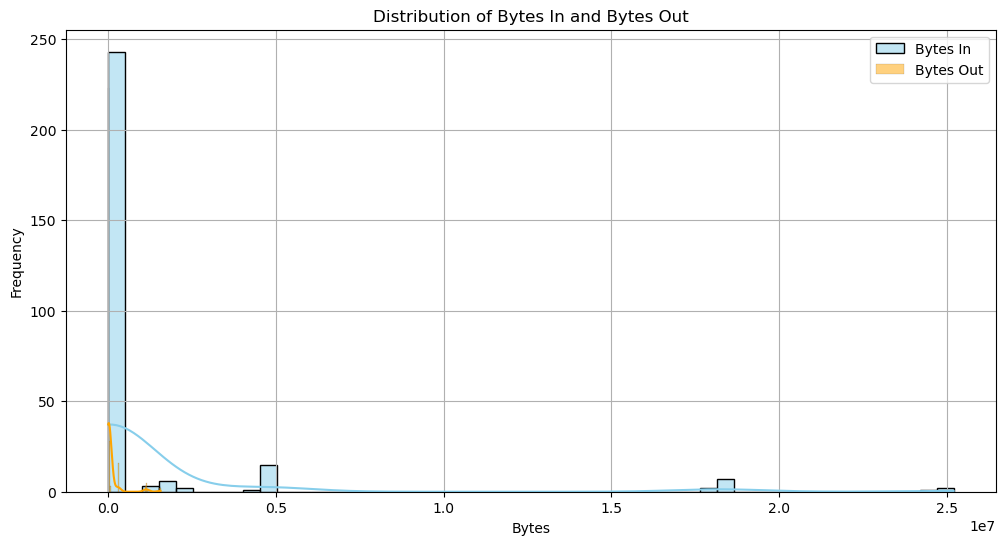

In [ ]:
# 📊 Interactive Bytes Distribution Analysis
print("📊 Creating interactive bytes distribution visualization...")

# Create subplots for bytes analysis
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Bytes In Distribution', 'Bytes Out Distribution', 
                   'Bytes In vs Bytes Out Scatter', 'Box Plot Comparison'),
    specs=[[{'secondary_y': False}, {'secondary_y': False}],
           [{'secondary_y': False}, {'secondary_y': False}]]
)

# Histogram for Bytes In
fig.add_trace(
    go.Histogram(x=df['bytes_in'], name='Bytes In', nbinsx=50, 
                opacity=0.7, marker_color='skyblue'),
    row=1, col=1
)

# Histogram for Bytes Out
fig.add_trace(
    go.Histogram(x=df['bytes_out'], name='Bytes Out', nbinsx=50,
                opacity=0.7, marker_color='orange'),
    row=1, col=2
)

# Scatter plot
fig.add_trace(
    go.Scatter(x=df['bytes_in'], y=df['bytes_out'], mode='markers',
              name='Bytes Correlation', marker=dict(size=4, opacity=0.6)),
    row=2, col=1
)

# Box plots
fig.add_trace(
    go.Box(y=df['bytes_in'], name='Bytes In', marker_color='skyblue'),
    row=2, col=2
)
fig.add_trace(
    go.Box(y=df['bytes_out'], name='Bytes Out', marker_color='orange'),
    row=2, col=2
)

fig.update_layout(
    height=800,
    title_text='📊 Interactive Bytes Traffic Analysis',
    showlegend=True
)

fig.show()


C:\Users\jayku\AppData\Local\Temp\ipykernel_2424\1708578043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df, palette='pastel')


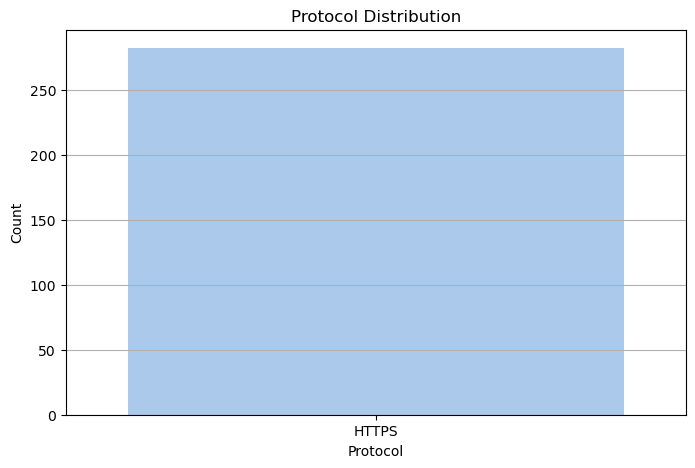

In [ ]:
# 🌐 Interactive Protocol Distribution
print("🌐 Creating interactive protocol distribution...")

if 'protocol' in df.columns:
    protocol_counts = df['protocol'].value_counts()
    
    # Create interactive bar chart
    fig = px.bar(
        x=protocol_counts.index,
        y=protocol_counts.values,
        title='🌐 Protocol Distribution Analysis',
        labels={'x': 'Protocol Type', 'y': 'Number of Connections'},
        color=protocol_counts.values,
        color_continuous_scale='viridis'
    )
    
    fig.update_layout(
        xaxis_title='Protocol',
        yaxis_title='Count',
        height=500
    )
    
    fig.show()
    
    # Create pie chart
    fig_pie = px.pie(
        values=protocol_counts.values,
        names=protocol_counts.index,
        title='🥧 Protocol Distribution (Pie Chart)'
    )
    fig_pie.show()
else:
    print("⚠️ Protocol column not found in dataset")


C:\Users\jayku\AppData\Local\Temp\ipykernel_2424\3978597586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='src_ip_country_code', data=df,


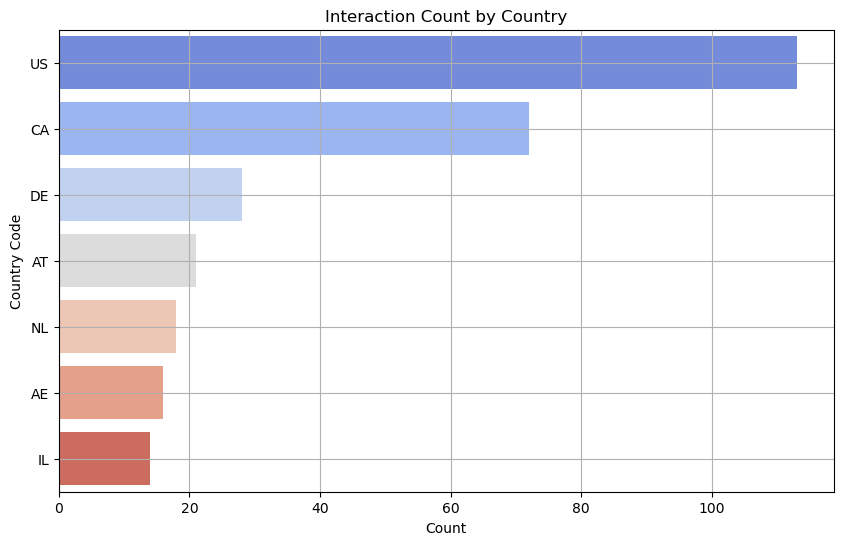

In [ ]:
# 🗺️ Interactive Geographic Analysis
print("🗺️ Creating interactive geographic threat analysis...")

if 'src_ip_country_code' in df.columns:
    country_counts = df['src_ip_country_code'].value_counts().head(20)
    
    # Interactive horizontal bar chart
    fig = px.bar(
        x=country_counts.values,
        y=country_counts.index,
        orientation='h',
        title='🗺️ Top 20 Countries by Attack Volume',
        labels={'x': 'Number of Attacks', 'y': 'Country Code'},
        color=country_counts.values,
        color_continuous_scale='Reds'
    )
    
    fig.update_layout(
        height=600,
        yaxis={'categoryorder': 'total ascending'}
    )
    
    fig.show()
    
    # Create treemap for country distribution
    fig_tree = px.treemap(
        names=country_counts.index,
        values=country_counts.values,
        title='🌳 Country Attack Distribution (Treemap)'
    )
    fig_tree.show()
else:
    print("⚠️ Country code column not found in dataset")


C:\Users\jayku\AppData\Local\Temp\ipykernel_2424\2896277388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dst_port', data=df[df['detection_types'] == 'waf_rule'], palette='Set2')


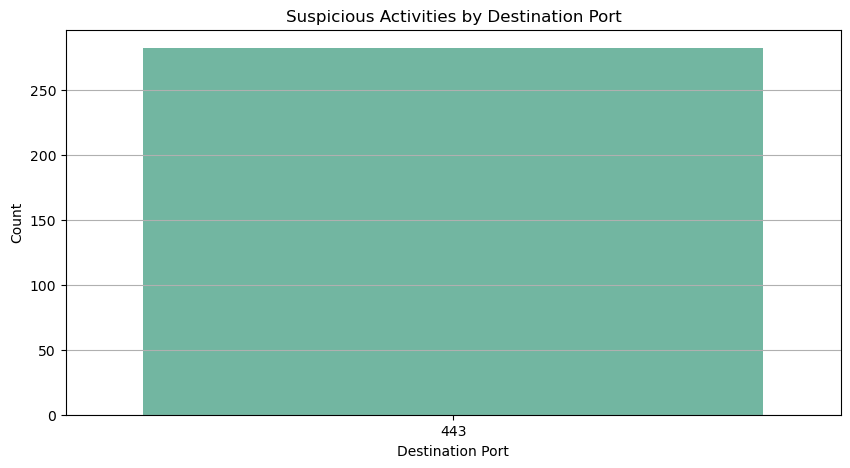

In [ ]:
# 🎯 Interactive Port Analysis
print("🎯 Creating interactive destination port analysis...")

if 'dst_port' in df.columns:
    # Get top 10 most targeted ports
    port_counts = df['dst_port'].value_counts().head(10)
    
    # Interactive bar chart with hover information
    fig = px.bar(
        x=port_counts.index.astype(str),
        y=port_counts.values,
        title='🎯 Top 10 Most Targeted Destination Ports',
        labels={'x': 'Port Number', 'y': 'Attack Count'},
        color=port_counts.values,
        color_continuous_scale='plasma'
    )
    
    # Add port descriptions
    port_descriptions = {
        80: 'HTTP',
        443: 'HTTPS', 
        22: 'SSH',
        21: 'FTP',
        25: 'SMTP',
        53: 'DNS',
        110: 'POP3',
        143: 'IMAP',
        993: 'IMAPS',
        995: 'POP3S'
    }
    
    # Update hover template
    fig.update_traces(
        hovertemplate='<b>Port:</b> %{x}<br><b>Attacks:</b> %{y}<br><extra></extra>'
    )
    
    fig.update_layout(height=500)
    fig.show()
    
    # Filter for specific detection types if available
    if 'detection_types' in df.columns:
        waf_data = df[df['detection_types'].str.contains('waf', case=False, na=False)]
        if len(waf_data) > 0:
            waf_ports = waf_data['dst_port'].value_counts().head(10)
            
            fig_waf = px.bar(
                x=waf_ports.index.astype(str),
                y=waf_ports.values,
                title='🛡️ WAF Rule Triggered - Top Ports',
                labels={'x': 'Port Number', 'y': 'WAF Triggers'},
                color=waf_ports.values,
                color_continuous_scale='Reds'
            )
            fig_waf.show()
else:
    print("⚠️ Destination port column not found in dataset")


In [ ]:
# ⏰ Interactive Time-based Analysis
print("⏰ Creating interactive time-based analysis...")

if 'time' in df.columns and not df['time'].isna().all():
    # Extract hour from timestamp
    df['hour'] = df['time'].dt.hour
    df['day_of_week'] = df['time'].dt.day_name()
    
    # Hourly attack pattern
    hourly_attacks = df['hour'].value_counts().sort_index()
    
    fig = px.line(
        x=hourly_attacks.index,
        y=hourly_attacks.values,
        title='⏰ Attack Patterns by Hour of Day',
        labels={'x': 'Hour (24-hour format)', 'y': 'Number of Attacks'},
        markers=True
    )
    
    fig.update_layout(
        xaxis=dict(tickmode='linear', tick0=0, dtick=2),
        height=400
    )
    
    fig.show()
    
    # Day of week analysis
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_attacks = df['day_of_week'].value_counts().reindex(day_order)
    
    fig_day = px.bar(
        x=daily_attacks.index,
        y=daily_attacks.values,
        title='📅 Attack Distribution by Day of Week',
        labels={'x': 'Day of Week', 'y': 'Number of Attacks'},
        color=daily_attacks.values,
        color_continuous_scale='blues'
    )
    
    fig_day.show()
else:
    print("⚠️ Time column not available or contains only null values")


In [ ]:
# 🔢 Feature Engineering with Error Handling
print("🔢 Creating engineered features...")

try:
    # Create avg_packet_size with proper error handling
    if 'session_duration' in df.columns and df['session_duration'].notna().any():
        df['total_bytes'] = df['bytes_in'] + df['bytes_out']
        df['avg_packet_size'] = df['total_bytes'] / df['session_duration']
        
        # Handle infinite and NaN values
        df['avg_packet_size'] = df['avg_packet_size'].replace([np.inf, -np.inf], np.nan)
        df['avg_packet_size'] = df['avg_packet_size'].fillna(df['avg_packet_size'].median())
        
        print("✅ Created avg_packet_size feature")
        
        # Visualize the new feature
        fig = px.histogram(
            df, 
            x='avg_packet_size',
            title='📊 Average Packet Size Distribution',
            nbins=50
        )
        fig.show()
    else:
        print("⚠️ Cannot create avg_packet_size: session_duration not available")
        
except Exception as e:
    print(f"⚠️ Error in feature engineering: {e}")


In [ ]:
# 📊 Data Scaling and Normalization
print("📊 Performing data scaling and normalization...")

try:
    from sklearn.preprocessing import StandardScaler, RobustScaler
    
    # Select numeric columns for scaling
    numeric_cols = ['bytes_in', 'bytes_out']
    if 'session_duration' in df.columns:
        numeric_cols.append('session_duration')
    if 'avg_packet_size' in df.columns:
        numeric_cols.append('avg_packet_size')
    
    # Filter to only existing columns
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    if numeric_cols:
        # Use RobustScaler for better handling of outliers
        scaler = RobustScaler()
        scaled_values = scaler.fit_transform(df[numeric_cols].fillna(0))
        
        # Create new DataFrame with scaled values
        scaled_df = pd.DataFrame(
            scaled_values, 
            columns=[f"scaled_{col}" for col in numeric_cols], 
            index=df.index
        )
        
        # Add to main df
        df = pd.concat([df, scaled_df], axis=1)
        
        print(f"✅ Scaled {len(numeric_cols)} numeric columns using RobustScaler")
        
        # Visualize scaling results
        fig = make_subplots(
            rows=1, cols=2,
            subplot_titles=('Original Data', 'Scaled Data')
        )
        
        # Original data
        for col in numeric_cols[:3]:  # Show first 3 columns
            fig.add_trace(
                go.Box(y=df[col], name=col),
                row=1, col=1
            )
        
        # Scaled data
        for col in numeric_cols[:3]:  # Show first 3 scaled columns
            fig.add_trace(
                go.Box(y=df[f'scaled_{col}'], name=f'scaled_{col}'),
                row=1, col=2
            )
        
        fig.update_layout(
            title='📊 Data Scaling Comparison',
            height=400
        )
        fig.show()
    else:
        print("⚠️ No numeric columns found for scaling")
        
except Exception as e:
    print(f"⚠️ Error in data scaling: {e}")


In [ ]:
# 🏷️ Categorical Encoding
print("🏷️ Performing categorical encoding...")

try:
    from sklearn.preprocessing import LabelEncoder
    
    # Use LabelEncoder for better memory efficiency
    categorical_cols = ['src_ip_country_code', 'protocol', 'detection_types']
    categorical_cols = [col for col in categorical_cols if col in df.columns]
    
    if categorical_cols:
        for col in categorical_cols:
            if df[col].notna().any():  # Only encode if column has non-null values
                le = LabelEncoder()
                df[f'{col}_encoded'] = le.fit_transform(df[col].fillna('Unknown'))
                print(f"✅ Encoded {col} -> {col}_encoded")
                
                # Show encoding mapping for first few values
                unique_vals = df[col].value_counts().head(5)
                print(f"   Top 5 categories: {list(unique_vals.index)}")
        
        print(f"\n✅ Categorical encoding completed for {len(categorical_cols)} columns")
    else:
        print("⚠️ No categorical columns found for encoding")
        
except Exception as e:
    print(f"⚠️ Error in categorical encoding: {e}")


In [ ]:
# 🔗 Interactive Correlation Analysis
print("🔗 Creating interactive correlation analysis...")

try:
    # Select numeric columns for correlation
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_columns) > 1:
        # Calculate correlation matrix
        corr_matrix = df[numeric_columns].corr()
        
        # Create interactive heatmap
        fig = px.imshow(
            corr_matrix,
            title='🔗 Feature Correlation Heatmap',
            color_continuous_scale='RdBu',
            aspect='auto'
        )
        
        fig.update_layout(
            height=600,
            width=800
        )
        
        fig.show()
        
        # Show strongest correlations
        corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    abs(corr_matrix.iloc[i, j])
                ))
        
        corr_pairs.sort(key=lambda x: x[2], reverse=True)
        print("\n🔗 Top 5 strongest correlations:")
        for i, (col1, col2, corr) in enumerate(corr_pairs[:5]):
            print(f"{i+1}. {col1} ↔ {col2}: {corr:.3f}")
    else:
        print("⚠️ Insufficient numeric columns for correlation analysis")
        
except Exception as e:
    print(f"⚠️ Error in correlation analysis: {e}")


In [ ]:
# 💾 Save Processed Data
print("💾 Saving processed data...")

try:
    # Save the cleaned and processed dataset
    output_path = "../data/transformed_cyber_data.csv"
    df.to_csv(output_path, index=False)
    print(f"✅ Processed data saved to: {output_path}")
    
    # Data summary for final review
    print(f"\n📊 Final Dataset Summary:")
    print(f"   • Shape: {df.shape}")
    print(f"   • Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print(f"   • Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}")
    print(f"   • Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")
    print(f"   • DateTime columns: {len(df.select_dtypes(include=['datetime64']).columns)}")
    
    # Show column types
    print(f"\n📋 Column Overview:")
    for dtype in df.dtypes.value_counts().index:
        cols = df.select_dtypes(include=[dtype]).columns.tolist()
        print(f"   • {dtype}: {len(cols)} columns")
        
except Exception as e:
    print(f"❌ Error saving data: {e}")

print("\n🎉 Data cleaning and EDA completed successfully!")
